In [1]:
import datetime
from os import path
import math
import collections
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:-.3e}".format})
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import scipy.signal as signal
import core as co
import sys

plt.rcParams['figure.figsize'] = (5, 4)

In [2]:
import hist_data as hd

hd.set_hist_data(data_count=None)


forecast:
direction: buy-sell
min profit [PIP]: 5.33
panic value [PIP]: -0.60 - no panic



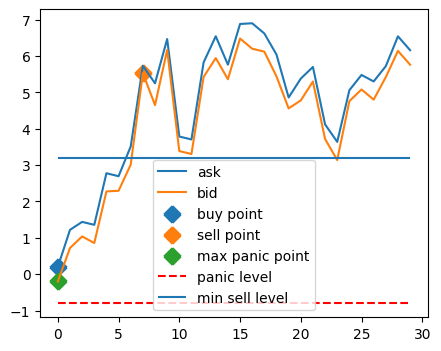

In [42]:
import random
import importlib
import tokenizer as to
import forecast as fo
importlib.reload(fo)
import piecewise_fit as ls
importlib.reload(ls)
importlib.reload(co)

FORECAST_WINDOW = 30
FORECAST_THRESHOLD = 2e-4 + 1e-4 # spread

shift = random.randint(0, 2000)
forecast = fo.Forecast(
    hd.DATA[shift: FORECAST_WINDOW + shift], 
    threshold=FORECAST_THRESHOLD)
print(forecast)
forecast.plot(True)
# [0.000114, 0.000227, 0.000455, 0.00091, 0.00182, 0.00364, 0.00728, 0.0146]


In [4]:
FORECAST_THRESHOLD = co.config.FORECAST_THRESHOLD
PANIC_THRESHOLD = co.config.PANIC_THRESHOLD
FORECAST_WINDOW = co.config.FORECAST_WINDOW
RISK_FACTOR = 0.7

## GamblerSimple

In [5]:
import gambler_simple as gs
_ = importlib.reload(hd)
_ = importlib.reload(fo)
_ = importlib.reload(gs) 

In [6]:
hd.set_hist_data(data_count=None)
oracle = fo.Oracle(hd.ForexProvider())

advice: buy-sell, profit: 4.6e-04, min. profit: 3.0e-04


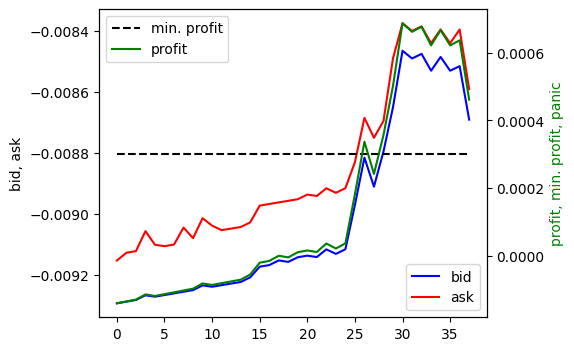

In [7]:
g = gs.gambler(forex_prediction=oracle.prediction, plot=True)

In [8]:
hd.set_hist_data(data_count=None, verbose=False)
oracle = fo.Oracle(hd.ForexProvider())

profits = []
timestamps = []
times = []

while True:
    g = gs.gambler(forex_prediction=oracle.prediction, min_profit=3e-4, risk_factor=0.8)
    if (g is None) or g.endofdata:
        break
    profits.append(g.profit)
    timestamps.append(g.timestamp)
    times.append(g.times[-1])

END OF DATA


In [9]:
trans_count = len(profits)
profits = np.array(profits)
total = sum(profits)
print(f'trans. count: {trans_count}')
print(f'total profit: {total:.1e}')
print(f'mean profit: {total / trans_count:.1e}')


trans. count: 27508
total profit: 1.0e+01
mean profit: 3.8e-04


min_profit=4e-3, risk_factor=0.8
trans. count: 22
total profit: 8.7e-02
mean profit: 4.0e-03

min_profit=3e-4, risk_factor=0.8
trans. count: 27508
total profit: 1.0e+01
mean profit: 3.8e-04

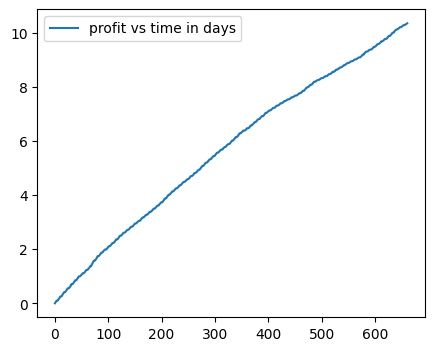

In [30]:
cumprofit = profits.cumsum()
timestamps = np.array(timestamps)
days = (timestamps - timestamps[0]) / 60 / 60 / 24
plt.plot(days, cumprofit, label='profit vs time in days')
plt.legend()
plt.show()

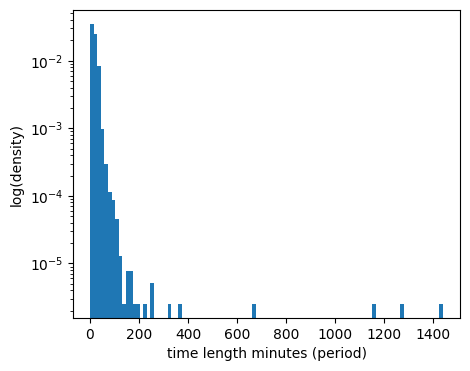

In [11]:
plt.hist(times, bins=100, density=True, log=True)
plt.xlabel('time length minutes (period)')
plt.ylabel('log(density)')
plt.show()

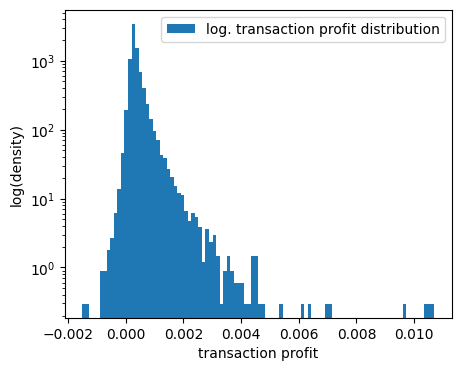

In [29]:
plt.hist(profits, bins=100, density=True, log=True, label='log. transaction profit distribution')
plt.xlabel('transaction profit')
plt.ylabel('log(density)')
plt.legend()
plt.show()

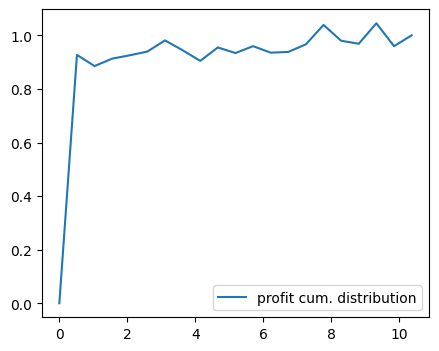

In [25]:
cumprofit = profits.cumsum()
hist, bin_edges = np.histogram(cumprofit, bins=20, )
plt.plot(bin_edges, np.insert(hist / hist[-1], 0, 0), label='profit cum. distribution')
plt.legend()
plt.show()

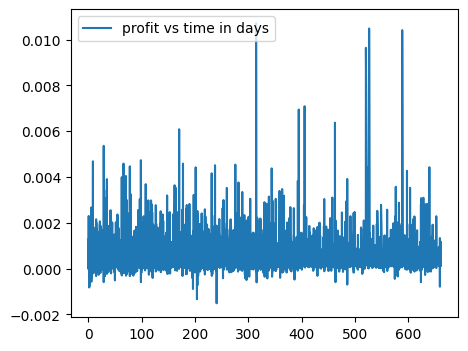

In [17]:
days = (timestamps - timestamps[0]) / 60 / 60 / 24
plt.plot(days, profits, label='profit vs time in days')
plt.legend()
plt.show()

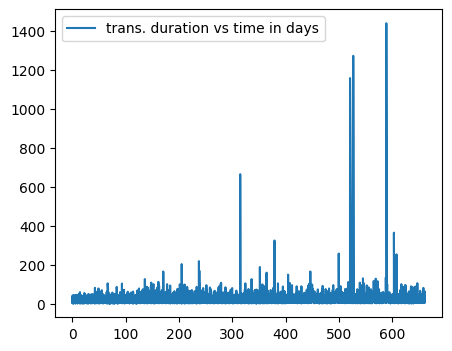

In [20]:
days = (timestamps - timestamps[0]) / 60 / 60 / 24
plt.plot(days, times, label='trans. duration vs time in days')
plt.legend()
plt.show()